## Observations and Insights 

In [307]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_study_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice in the DataFrame.
mouse_count = combined_study_data["Mouse ID"].nunique()
mouse_count

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'],keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_study_data[combined_study_data.duplicated(['Mouse ID'],keep = False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [363]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates_mouse = combined_study_data.drop_duplicates(subset="Mouse ID", keep = "first")
no_duplicates_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [364]:
# Checking the number of mice in the clean DataFrame.
mouse_count_nodupes = no_duplicates_mouse["Mouse ID"].count()
mouse_count_nodupes

249

## Summary Statistics

In [365]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_groups = combined_study_data.groupby(["Drug Regimen"])
regimen_mean = regimen_groups["Tumor Volume (mm3)"].mean()
regimen_median = regimen_groups["Tumor Volume (mm3)"].median()
regimen_variance = regimen_groups["Tumor Volume (mm3)"].var()
regimen_sd = regimen_groups["Tumor Volume (mm3)"].std()
regimen_sem = regimen_groups["Tumor Volume (mm3)"].sem()
regimen_count = regimen_groups["Mouse ID"].count()
summary_df = pd.DataFrame({"Mean": regimen_mean, "Median" : regimen_median,"Variance": 
regimen_variance,"Standard Deviation" : regimen_sd,"SEM": regimen_sem,"Count":regimen_count})
#added count for future tasks 
summary_df.head(10)

,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar Plots

([<matplotlib.axis.XTick at 0x1a29287e10>,
 <a list of 10 Text xticklabel objects>)

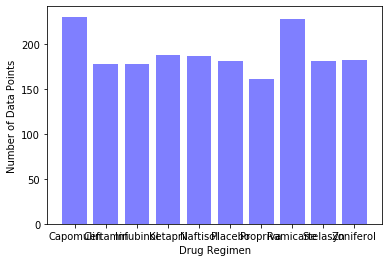

In [383]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using Matplot
x_axis= np.arange(len(regimen_count))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
#did not make it bigger so x-ticks do not overlap

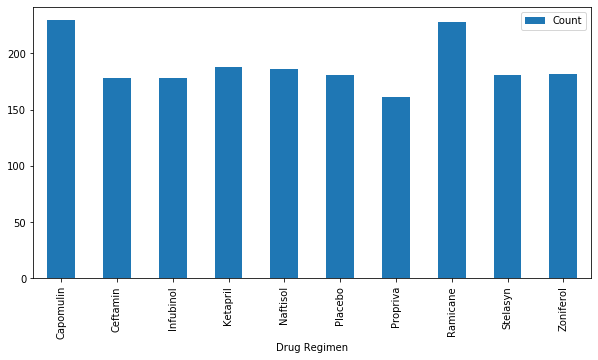

<Figure size 432x288 with 0 Axes>

In [161]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_plot= summary_df[["Count"]]
bar_plot.plot(kind="bar",figsize=(10,5))
plt.show()
plt.tight_layout()

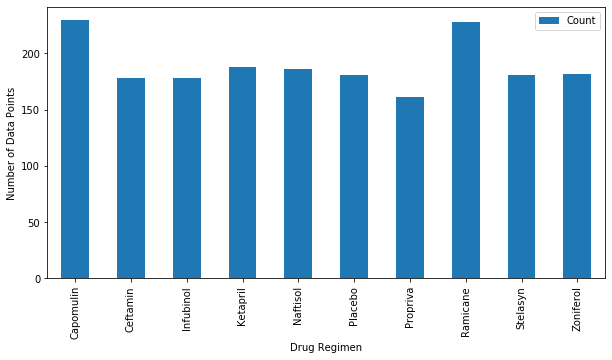

<Figure size 432x288 with 0 Axes>

In [100]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimen_and_mice_count=summary_df[["Count"]]
#regimen_and_mice_count=regimen_and_mice_count.set_index("Drug Regimen")
regimen_and_mice_count.head(10)
regimen_and_mice_count.plot(kind="bar",figsize=(10,5))
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()



## Pie Plots

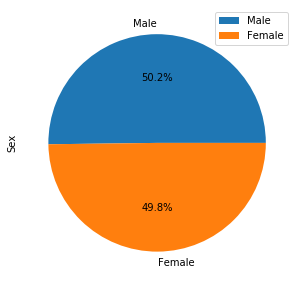

In [359]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = no_duplicates_mouse.groupby(["Sex"])
gender_count = gender_group["Sex"].count()
gender_pie = pd.DataFrame({'Sex': [125, 124]},index=['Male','Female'])
plot = gender_pie.plot.pie(y='Sex',figsize=(5,5),autopct="%1.1f%%")


Text(0.5, 1.0, 'Sex')

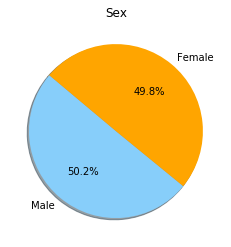

In [358]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = no_duplicates_mouse.groupby(["Sex"])
gender_count = gender_group["Sex"].count()
gender_count
labels = ["Male","Female"]
sizes = [125,124]
explode = (0,0)
colors= ["lightskyblue","orange"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Sex')

## Quartiles, Outliers and Boxplots

In [353]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#drug_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']
#regimen_four_groups= combined_study_data[combined_study_data['Drug Regimen'].isin(drug_regimen)]
cap_volume_df=combined_study_data[combined_study_data['Drug Regimen']=='Capomulin']
cap_timepoint=cap_volume_df[cap_volume_df['Timepoint']==45]
cap_volume= cap_timepoint['Tumor Volume (mm3)']
cap_quartiles=cap_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq=cap_quartiles[0.25]
cap_upperq=cap_quartiles[0.75]
cap_iqr=cap_upperq-cap_lowerq
cap_lower_bound= cap_lowerq - (1.5*cap_iqr)
cap_upper_bound= cap_upperq +(1.5*cap_iqr)
cap_outliers=[]
for volume in cap_volume:
    if volume < cap_lower_bound or volume > cap_upper_bound:
        cap_outliers.append(volume)

inf_volume_df=combined_study_data[combined_study_data['Drug Regimen']=='Infubinol']
inf_timepoint=inf_volume_df[inf_volume_df['Timepoint']==45]
inf_volume= inf_timepoint['Tumor Volume (mm3)']
inf_quartiles=inf_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq=inf_quartiles[0.25]
inf_upperq=inf_quartiles[0.75]
inf_iqr=inf_upperq-inf_lowerq
inf_lower_bound= inf_lowerq - (1.5*inf_iqr)
inf_upper_bound= inf_upperq +(1.5*inf_iqr)
inf_outliers=[]
for volume in inf_volume:
    if volume < inf_lower_bound or volume > inf_upper_bound:
        inf_outliers.append(volume)

ram_volume_df=combined_study_data[combined_study_data['Drug Regimen']=='Ramicane']
ram_timepoint=ram_volume_df[ram_volume_df['Timepoint']==45]
ram_volume= ram_timepoint['Tumor Volume (mm3)']
ram_quartiles=ram_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq=ram_quartiles[0.25]
ram_upperq=ram_quartiles[0.75]
ram_iqr=ram_upperq-ram_lowerq
ram_lower_bound= ram_lowerq - (1.5*ram_iqr)
ram_upper_bound= ram_upperq +(1.5*ram_iqr)
ram_outliers=[]
for volume in ram_volume:
    if volume < ram_lower_bound or volume > ram_upper_bound:
        ram_outliers.append(volume)

cef_volume_df=combined_study_data[combined_study_data['Drug Regimen']=='Ceftamin']
cef_timepoint=cef_volume_df[cef_volume_df['Timepoint']==45]
cef_volume= cef_timepoint['Tumor Volume (mm3)']
cef_quartiles=cef_timepoint['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq=cef_quartiles[0.25]
cef_upperq=cef_quartiles[0.75]
cef_iqr=cef_upperq-cef_lowerq
cef_lower_bound= cef_lowerq - (1.5*cef_iqr)
cef_upper_bound= cef_upperq +(1.5*cef_iqr)
cef_outliers=[]
for volume in cef_volume:
    if volume < cef_lower_bound or volume > cef_upper_bound:
        cef_outliers.append(volume)

#Checked the Infubinol values for Timepoint 45 and there are no Tumor Volumes that are outliers so I did not get an values like in results. 
print('Capomulin potential outliers:', cap_outliers)
print('Ramicane potential outliers:', ram_outliers)
print('Infubinol potential outliers:', inf_outliers)
print('Ceftamin potential outliers:', cef_outliers)



Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: []
Ceftamin potential outliers: []


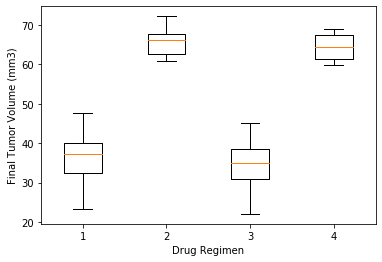

In [357]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data=[(cap_timepoint['Tumor Volume (mm3)']),(inf_timepoint['Tumor Volume (mm3)']),(ram_timepoint['Tumor Volume (mm3)']),(cef_timepoint['Tumor Volume (mm3)'])]
fig,ax = plt.subplots()
ax.boxplot(data)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()
#did not make the x-axis label to be the treatments

## Line and Scatter Plots

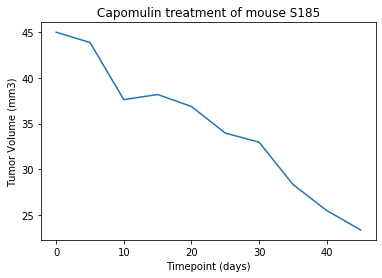

In [237]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#I picked mouse s185.
cap_volume_mouse= cap_volume_df[cap_volume_df['Mouse ID']=='s185']
x_axis=cap_volume_mouse['Timepoint']
y_axis=cap_volume_mouse['Tumor Volume (mm3)']
plt.plot(x_axis,y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse S185')
plt.show()


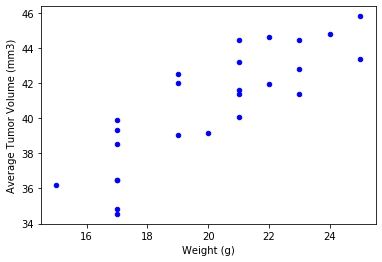

In [301]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_plot_df= cap_volume_df[['Mouse ID','Weight (g)','Timepoint','Tumor Volume (mm3)']]
cap_groups= cap_plot_df.groupby(['Mouse ID'])
cap_groups_mean= cap_groups['Tumor Volume (mm3)'].mean()
plot_data = pd.merge(cap_groups_mean,cap_plot_df, on = "Mouse ID")
plot_data_no_dupes= plot_data.drop_duplicates(subset="Mouse ID", keep="first")
cap_plot = plot_data_no_dupes.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)_x',c='Blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


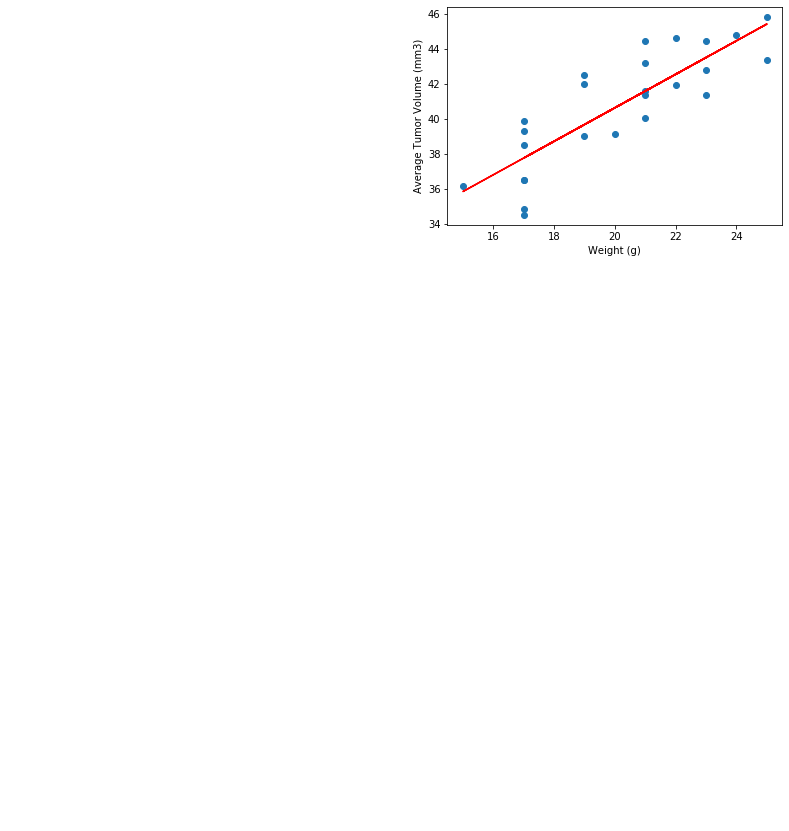

In [320]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight= plot_data_no_dupes['Weight (g)']
volume= plot_data_no_dupes['Tumor Volume (mm3)_x']
correlation= st.pearsonr(weight,volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()

